In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

In [278]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [279]:
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [280]:
df = df.dropna()

In [281]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.8+ KB
None


In [282]:
df.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

In [283]:
df.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping


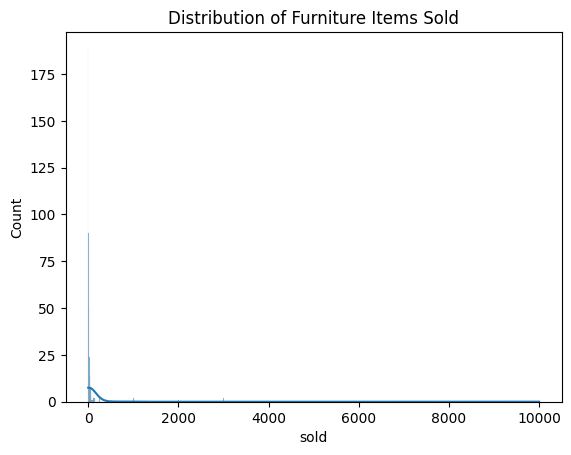

In [284]:
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

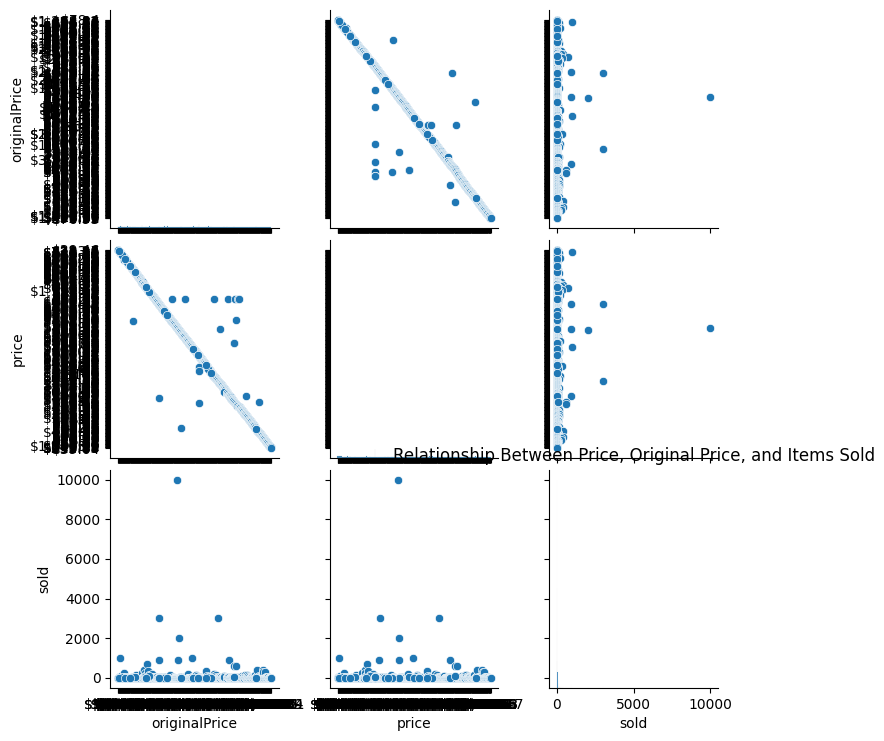

In [285]:
sns.pairplot(df, vars=['originalPrice', 'price', 'sold'], kind='scatter')
plt.title('Relationship Between Price, Original Price, and Items Sold')
plt.show()

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [287]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

In [288]:
df['originalPrice'] = df['originalPrice'].replace(r'[\$,]', '', regex=True).astype(float)

In [289]:
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

In [290]:
import pandas as pd
import re

def extract_shipping(text):
    if pd.isna(text):
        return 0.0
    text = str(text).lower()  
    if "free" in text:
        return 0.0
    match = re.search(r"\$([\d\.]+)", text)
    if match:
        return float(match.group(1))
    return 0.0

In [291]:
df['tagText'] = df['tagText'].apply(extract_shipping)

In [292]:
Vectorizertfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = Vectorizertfidf.fit_transform(df['productTitle'])

productTitle_tfidf_df = pd.DataFrame(
    productTitle_tfidf.toarray(),
    index=df.index,  # 🔒 Important to preserve original row alignment
    columns=Vectorizertfidf.get_feature_names_out()
)

In [293]:
df.head()

,productTitle,originalPrice,price,sold,tagText,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0.0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0.0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0.0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0.0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0.0,50.669427


In [294]:
df = pd.concat([df, productTitle_tfidf_df], axis=1)
df = df.drop('productTitle', axis=1)

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [296]:
X = df.drop('sold', axis=1)
y = df['sold']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
lr_model = LinearRegression()

In [299]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [300]:
y_pred_lr = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2= r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse}, R2: {r2}')


Linear Regression MSE: 194092.8358228774, R2: -0.4103025976497541
